# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [2]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.


In [1]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Visualiza el DataFrame
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


| **Métrica**                               | **Representación conceptual**                                                            | **Foco principal**                     |
| ----------------------------------------- | ---------------------------------------------------------------------------------------- | -------------------------------------- |
| **Exactitud (Accuracy o Asertividad)**    | Proporción de *todas* las predicciones correctas sobre el total de casos.                | Mide el rendimiento global del modelo. |
| **Precisión (Precision)**                 | De todo lo que el modelo predijo como **positivo**, ¿qué fracción es realmente positiva? | Minimizar **falsos positivos**.        |
| **Sensibilidad (Recall o Exhaustividad)** | De todo lo que era realmente **positivo**, ¿qué fracción detectó el modelo?              | Minimizar **falsos negativos**.        |

##### Fromulas y Abreviaturas comunes

    Abreviaturas:
    
        TP = Verdaderos Positivos ---> (El modelo acierta, predice "1" y es "1")
        
        TN = Verdaderos Negativos ---> (El modelo acierta, predice "0" y es "0")
        
        FP = Falsos Positivos ---> (El modelo se equivoca, predice "1" y es "0")
        
        FN = Falsos Negativos ---> (El modelo se equivoca, predice "0" y es "1")
    
    Exactitud (Accuracy)
    
        Accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    Precisión (Precision)
    
        Precision = TP / (TP + FP)
        Mide qué proporción de las predicciones positivas fueron correctas.
    
    Recall (Sensibilidad)
    
        Recall = TP / (TP + FN)
        Mide qué proporción de los positivos reales fueron detectados.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
df.min()

Age               15
Sex                F
BP              HIGH
Cholesterol     HIGH
Na_to_K        6.269
Drug           DrugY
dtype: object

## <span style="color:green">2. Análisis de cada Variable</span>

In [10]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns

print("Max Age", df.Age.max())
print("Min Age", df.Age.min())
#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen

#Crea un displot para de la edad (por ser una variable numérica)


Max Age 74
Min Age 15


In [11]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

<Axes: xlabel='BP', ylabel='Count'>

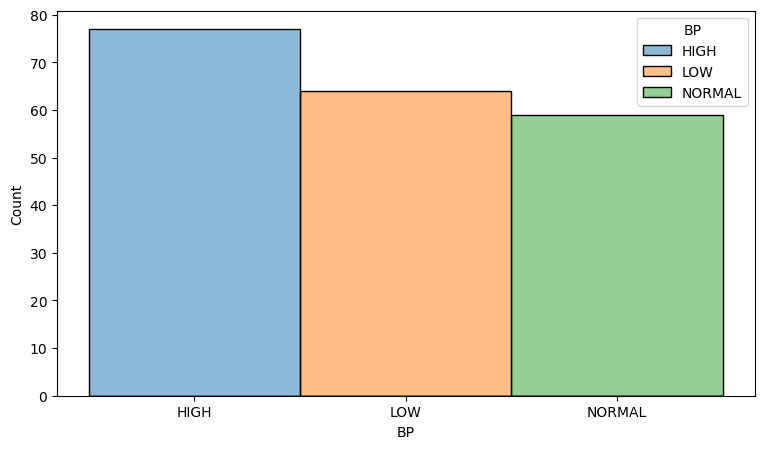

In [12]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="BP",hue="BP")

<Axes: xlabel='Cholesterol', ylabel='Count'>

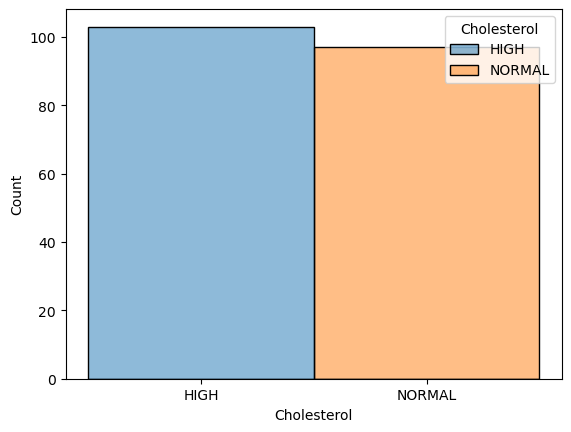

In [13]:
# Crea una gráfica de barras para Colesterol
sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")

In [9]:
# Crea un displot para Sodio Potasio


revisar la clase del 24/11

<bound method IndexOpsMixin.value_counts of 0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object>

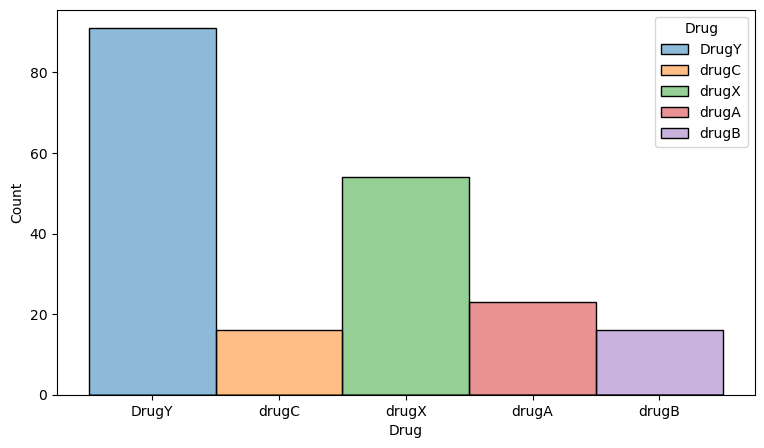

In [14]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize=(9,5))
sns.histplot(data=df,x="Drug",hue="Drug")
#Cuenta los medicamentos
df.Drug.value_counts

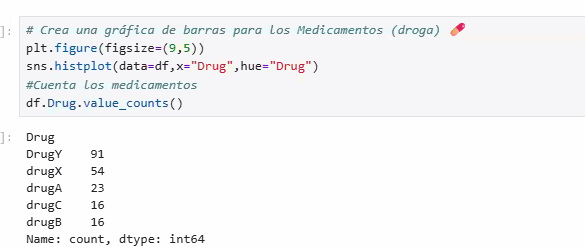

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Edad/medicamento')

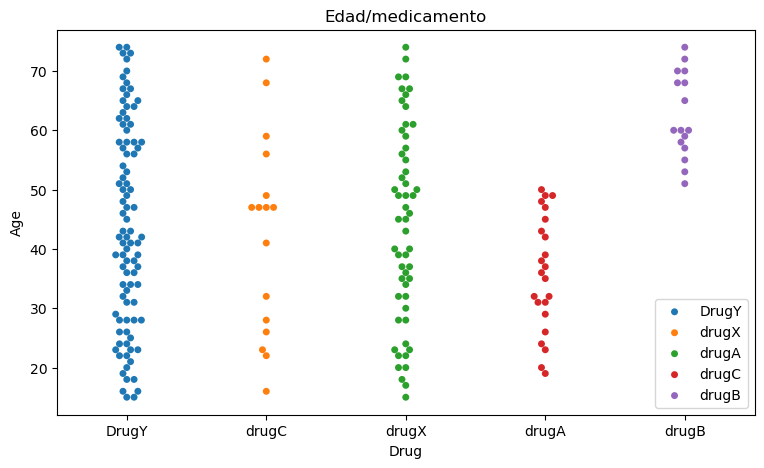

In [15]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize=(9,5))
sns.swarmplot(x = "Drug", y ="Age" , hue="Drug", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad/medicamento")

Text(0.5, 1.0, 'Generos por drogas')

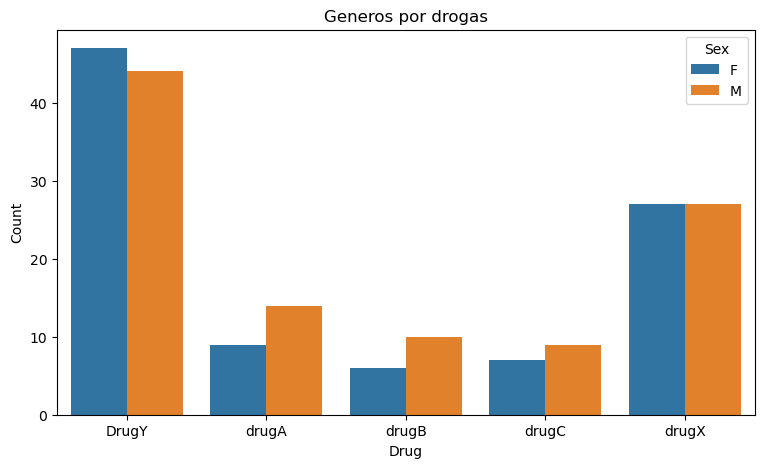

In [26]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drugs = df.groupby(["Drug","Sex"]).size().reset_index(name="Count")
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize=(9,5))
sns.barplot(x="Drug", y = "Count", hue="Sex", data = df_Sex_Drugs)
plt.title("Generos por drogas")

Text(0.5, 1.0, 'Presion sanguinea por drogas')

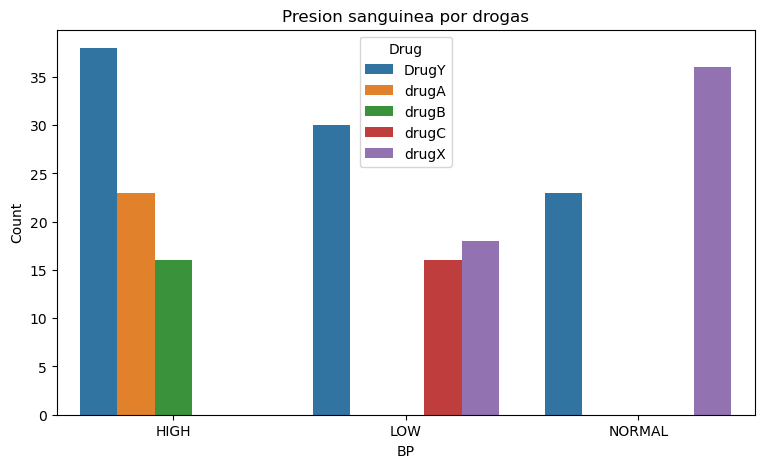

In [27]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drugs = df.groupby(["Drug","BP"]).size().reset_index(name="Count")
plt.figure(figsize=(9,5))
sns.barplot(x="BP", y = "Count", hue="Drug", data = df_BP_Drugs)
plt.title("Presion sanguinea por drogas")

Text(0.5, 1.0, 'Presion sanguinea por drogas')

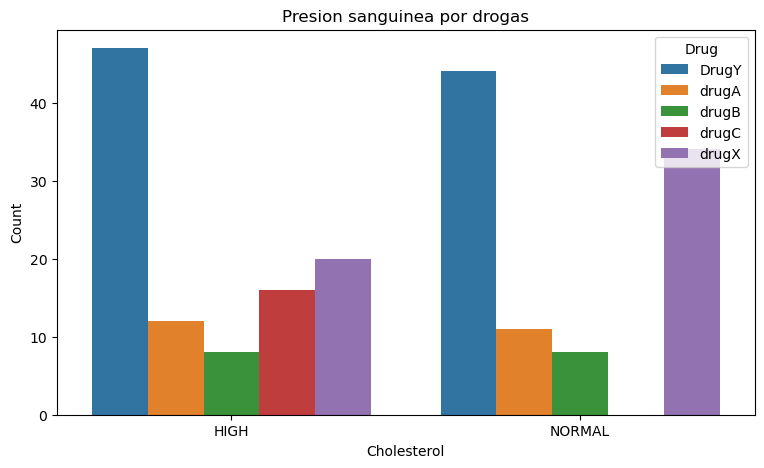

In [28]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_Cholesterol_Drugs = df.groupby(["Drug","Cholesterol"]).size().reset_index(name="Count")
plt.figure(figsize=(9,5))
sns.barplot(x="Cholesterol", y = "Count", hue="Drug", data = df_Cholesterol_Drugs)
plt.title("Presion sanguinea por drogas")

Text(0.5, 1.0, 'Sodio-Potasio/medicamento')

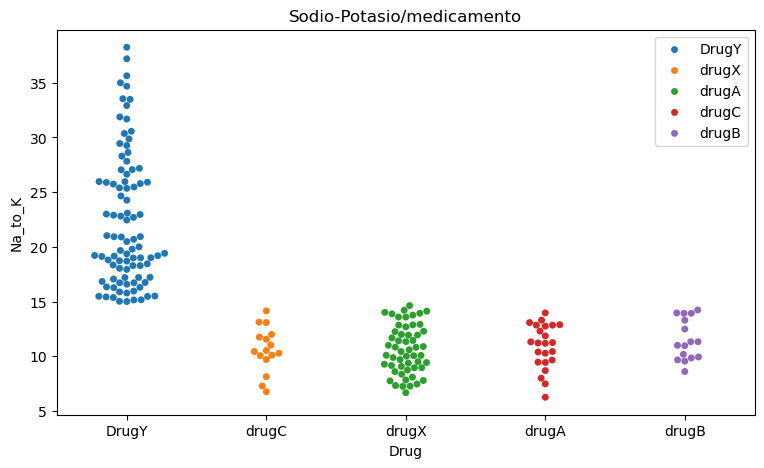

In [29]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize=(9,5))
sns.swarmplot(x = "Drug", y ="Na_to_K" , hue="Drug", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Sodio-Potasio/medicamento")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [30]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc

from sklearn.preprocessing import LabelEncoder # funciona como ordinal encoder pero sin darle importancia la orden alfabetico de los datos, simplemente los numeros por indice

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria]= le.fit_transform(df[datos_categoria])

variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in variables:
    label_encoder(l)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


In [31]:
# Crear set de entrenamiento y set de prueba
x = df.drop(["Drug"],axis=1)
y = df.Drug

from sklearn.model_selection import train_test_split

x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11,shuffle=True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=11

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [32]:
## Crear modelo para medicamento. Solo vamos a preguntar con esto si son o no la medicina Y(ya que es la mas popular con diferencia y asi nos la quitamos del computo)
y_train_y = (y_train == 0)
y_test_y = (y_test == 0)

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [33]:
## Modelo SGD= Stochastic Gradient Descent 

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=11)
sgd.fit(x_train, y_train_y)

SGDClassifier(random_state=11)

In [37]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([x_train.iloc[0]]) , y_train_y.iloc[0] # Sacara verdadero o falso dependiendo de si se le da la medicina Y o no 

C:\Users\Techie3\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


(array([ True]), np.True_)

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:Red">6.1 Exactitud</span>

In [46]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,x_train,y_train_y,cv = 3,scoring="accuracy") # 3 valoers porque se ha entrenado al modelo 3 veces cada vez con un trozo diferente de los datos como validacion sacando el dato de porcentaje de exactitud o de aciertos

array([0.81481481, 0.81132075, 0.77358491])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [49]:
# Modelo que nunca es Y
from sklearn.base import BaseEstimator
class NuncaC(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self, x):
        return np.zeros((len(x),1), dtype= bool)
nunca_c = NuncaC()
cross_val_score(nunca_c,x_train,y_train_y, cv=3, scoring="accuracy")

array([0.48148148, 0.49056604, 0.67924528])

***

### <span style="color:Yellow">6.2 Matriz de Confusión</span>

In [56]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd,x_train, y_train_y,cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_y,y_train_pred)

array([[66, 22],
       [10, 62]])

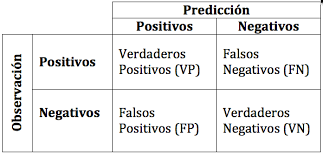

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [57]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score
p= precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r

(0.7380952380952381, 0.8611111111111112)

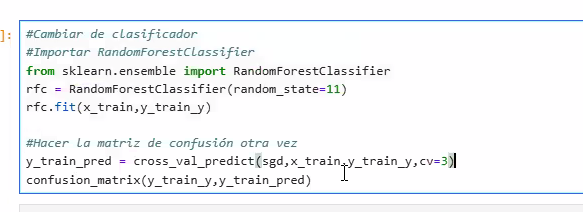

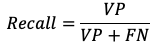

In [67]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=11)
rfc.fit(x_train,y_train_y)
#Hacer la matriz de confusión otra vez
y_train_pred = cross_val_predict(sgd,x_train,y_train_y,cv=3)
confusion_matrix(y_train_y,y_train_pred)

array([[66, 22],
       [10, 62]])


Modelo
rfc = RandomForestClassifier(random_state=11)

Predicciones usando K-Folds
y_train_pred = cross_val_predict(rfc, x_train, y_train_y, cv=3)

Matriz de confusión
cm = confusion_matrix(y_train_y, y_train_pred)
cm

In [68]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r

(0.7380952380952381, 0.8611111111111112)

In [69]:
#Calcular F1
from sklearn.metrics import f1_score
f1_score(y_train_y,y_train_pred)

0.7948717948717948

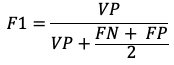

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [70]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47,1,0,8,0]])
y_score

C:\Users\Techie3\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([-31261.77288182])

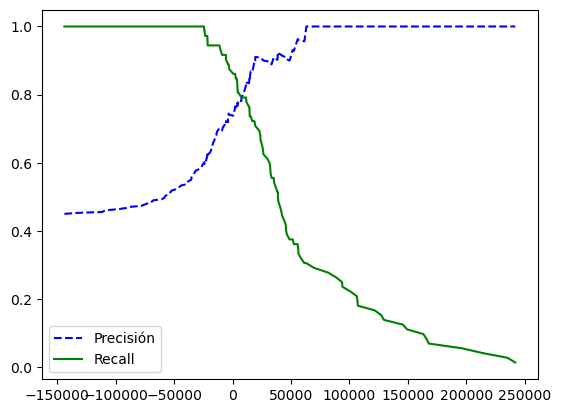

In [71]:
#Graficar la precisión y recall 
y_scores = cross_val_predict(sgd,x_train,y_train_y,cv=3,method="decision_function")
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y,y_scores)
plt.plot(umbrales,precisions[:-1],"b--",label="Precisión")
plt.plot(umbrales,recalls[:-1],"g-",label="Recall")
plt.legend()
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [72]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
umbral_90

np.float64(19455.889805745082)

In [74]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)
p = precision_score(y_train_y, y_train_90)
r = recall_score(y_train_y, y_train_90)
p,r

(0.9107142857142857, 0.7083333333333334)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

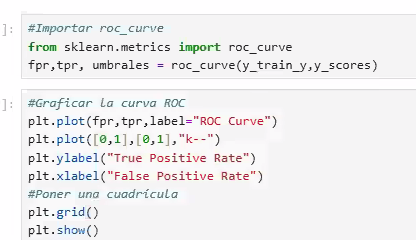

In [75]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr,tpr, umbrales = roc_curve(y_train_y,y_scores)

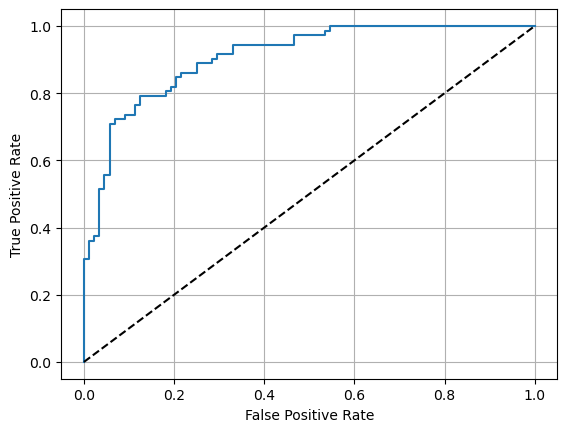

In [76]:
#Graficar la curva ROC
plt.plot(fpr,tpr,label="Roc Curve")
plt.plot([0,1],[0,1],"k--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#Poner una cuadrícula
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

El modelo que tenga mayuor area bajo la curva sera el mejor (lo siguiente que hacemos)

In [77]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_y,y_scores)

np.float64(0.9089330808080809)

In [79]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc,x_train,y_train_y,cv=3,method="predict_proba")
y_scores_forest = y_forest[:,1]

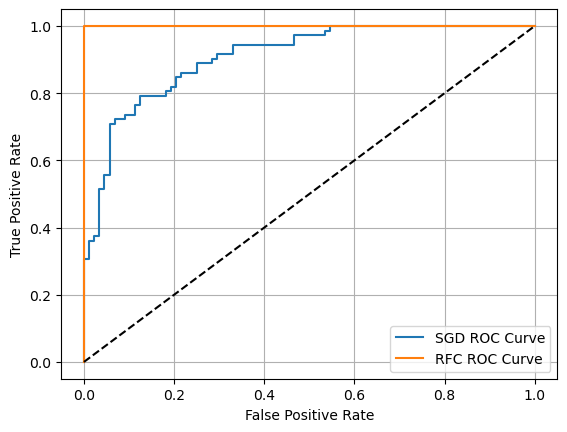

In [80]:
#Graficar la curva ROC y la predicción de random forest 
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_y,y_scores_forest)
plt.plot(fpr,tpr,label="SGD ROC Curve")
plt.plot(fpr_forest,tpr_forest,label="RFC ROC Curve")
plt.plot([0,1],[0,1],"k--")
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid()
plt.show()

In [81]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_y,y_scores)

np.float64(0.9089330808080809)

***

## <span style="color:green">7. Clasificadores Multiclase</span>


Por ahora solo hemos hecho si era la la medicina Y o no, ahora vamos haacerlo con todas las medicinas (necesitamos nuevos metodos)

hay muchos metodos de clasificacion pero los principales que avos a usar son:

    1º Que pasa a binario como hemos hecho con la Y, pero con todas las clases, de ahi saca un porcentaje y determina cual es la medicina deseada en este caso
    2º Uno vs Uno y la unidad que gano mas veces es la que sale victoriosa

In [104]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
svm= SVC()
svm.fit(x_train,y_train)


#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm.predict(sample)

array([0])

In [99]:
sample = pd.DataFrame([[25,0,0,167,1]], columns=x_train.columns)
sgd.predict(sample)

array([4])

In [105]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function(sample)
#Decidirá por el qué tenga mayor puntaje

array([[ 4.10609762,  2.02662834, -0.21412398,  0.78484091,  3.25129555]])

In [106]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier
svm = OneVsRestClassifier(SVC())
svm.fit(x_train,y_train)
#Predecir a un humano ahora con este clasificador
svm.predict(sample)

array([4])

In [107]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function(sample)

array([[-0.24012847, -1.02763934, -1.02494726, -0.99992064, -0.0325074 ]])

In [108]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.fit(x_train,y_train)

SGDClassifier(random_state=11)

***

## <span style="color:green">8. Analizar Errores</span>

In [109]:
#Hacer un clasificador de random forest
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=11)

In [110]:
#Utilizar la matriz de confusión 
y_train_pred = cross_val_predict(rfc,x_train,y_train,cv=3)
cnf_mz=confusion_matrix(y_train,y_train_pred)
cnf_mz # los numeros fuera de la diagonal son los falsos positivos

array([[72,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0],
       [ 0,  1, 11,  0,  0],
       [ 0,  0,  0, 14,  0],
       [ 1,  0,  0,  0, 43]])

In [111]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd,x_train, y_train,cv=3)
cnf_mz= confusion_matrix(y_train,y_train_pred)
cnf_mz

array([[64,  0,  5,  0,  3],
       [ 8,  0,  6,  0,  4],
       [ 0,  0,  6,  0,  6],
       [ 2,  0,  7,  0,  5],
       [ 9,  0, 17,  0, 18]])

Hay algunos fallos pero al operar todo correctamente entendemos quees por falta de datos

## Tarea:

Hacer este script con csv de kaggñe adaptando lo que demande el propio csv ("accuracy precision recall csv")